<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
# !git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [2]:
import os
# os.chdir('pytorch-CycleGAN-and-pix2pix/')
os.chdir('./')

In [3]:
!pip install -r requirements.txt

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 1.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408198 sha256=e3e76b13ab07905ad41cda0386176278e530b3bda4e65c0beba08ad6947c8aab
  Stored in directory: /root/.cache/pip/wheels/06/0b/e3/97650872dd527e7bda46b73d26b5e9531c331f0604e2fe7ace
Successfully built

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [4]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2024-06-08 23:49:54--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M  33.0KB/s    in 25m 47s 

2024-06-09 00:15:42 (19.0 KB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/1

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2024-06-09 00:15:43--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

d/latest_net_G.pth    0%[                    ] 381.76K  13.2KB/s    eta 2h 54m ^C


# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [6]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest          

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [7]:
!ls checkpoints/

facades_label2photo_pretrained	facades_pix2pix


In [13]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

# Visualize

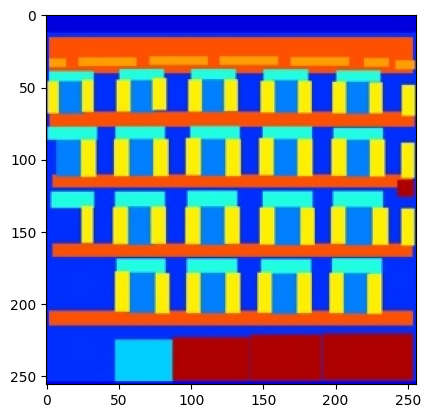

In [14]:
import matplotlib.pyplot as plt

img = plt.imread('./wandb/latest-run/files/media/images/real_A_45_7c609df615485ee59b96.png')
plt.imshow(img)

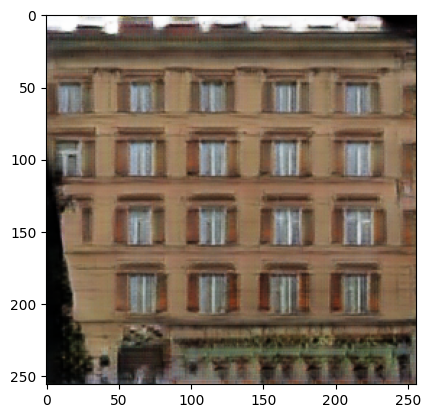

In [15]:
img = plt.imread('./wandb/latest-run/files/media/images/fake_B_45_4d1dc066e0f2c27ac702.png')
plt.imshow(img)

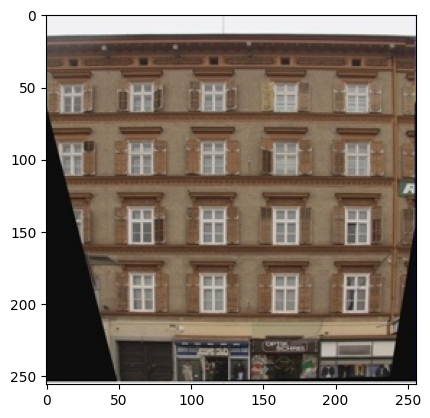

In [16]:
img = plt.imread('./wandb/latest-run/files/media/images/real_B_45_c91f3c7feabf8ebe8a36.png')
plt.imshow(img)